In [0]:
from fastai import *
from fastai.vision import *  # CV方面的工具大部分在这个包下面
from fastai.callbacks import *

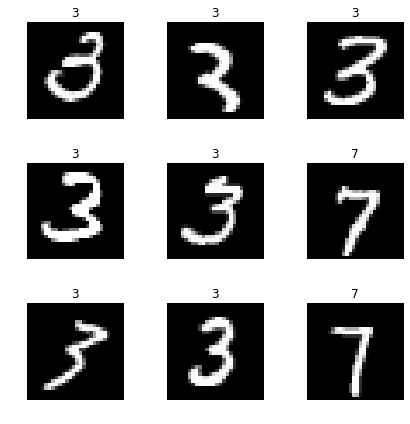

In [6]:
mnist_path = untar_data(URLs.MNIST_SAMPLE)  # 从网络下载精简版数据集并保存本地，返回路径
data = ImageDataBunch.from_folder(mnist_path)

data.show_batch(ds_type=DatasetType.Train, rows=3, figsize=(6, 6))


# 简单Learner

In [0]:
model = simple_cnn((3, 16, 16, 2))
learner = Learner(data=data, model=model)


In [9]:
learner.fit(1)

epoch,train_loss,valid_loss,time
0,0.137150,0.110711,00:06


# 添加复杂metric的Learner


In [14]:
model = simple_cnn((3, 16, 16, 2))
learner = Learner(data=data, model=model, metrics=[accuracy, AUROC(), error_rate])
learner.fit(1)

epoch,train_loss,valid_loss,accuracy,auroc,error_rate,time
0,0.117174,0.092379,0.969578,0.994372,0.030422,00:05


# 使用callback

In [16]:
model = simple_cnn((3, 16, 16, 2))
learner = Learner(data=data, model=model, metrics=[accuracy, AUROC(), error_rate])
callback = OneCycleScheduler(learn=learner, lr_max=0.01)
learner.fit(1, callbacks=callback)

epoch,train_loss,valid_loss,accuracy,auroc,error_rate,time
0,0.108612,0.087952,0.969087,0.994991,0.030913,00:05


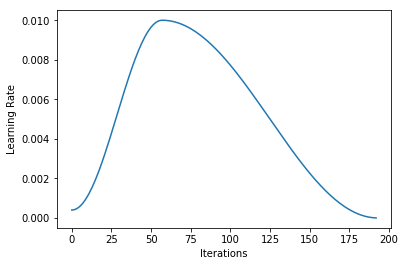

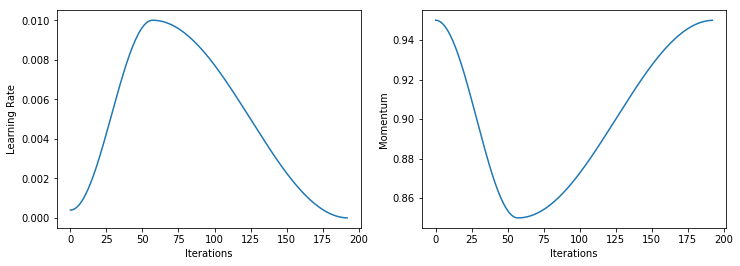

In [17]:
# print(learner.recorder)
learner.recorder.plot_lr()
learner.recorder.plot_lr(show_moms=True)

In [18]:
model = simple_cnn((3, 16, 16, 2))
learner = Learner(data=data, model=model, metrics=[accuracy, AUROC(), error_rate])
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,auroc,error_rate,time
0,0.145901,0.118628,0.958783,0.989888,0.041217,00:05


In [23]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy, AUROC(), error_rate])
learner.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 107133056.88it/s]


epoch,train_loss,valid_loss,accuracy,auroc,error_rate,time
0,0.172487,0.123684,0.956820,0.990360,0.043180,00:08
